In [1]:
%matplotlib inline

import numpy as np
import scipy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sympy as sp

import functools
import itertools

sns.set();

# Taylor expansion

## Taylor series

Let $f$ be a function with all derivatives throughout some interval containing $a$ as an interior point. Then the Taylor series generated by $f$ at $x = a$ is given by the following power series

$$f(x) = \sum_{k = 0}^{\infty} \frac{f^{k}(a)}{k!} (x-a)^{k}$$

where $k!$ denotes the factorial of $k$ and $f^{k}(a)$ denotes the nth derivative of $f$ evaluated at the point $a$.

Taking $a = 0$, we have the McLaurin series:

$$f(x) = \sum_{k = 0}^{\infty} \frac{f^{k}(0)}{k!} x^{k}$$

## Taylor polynomial

Let $f$ be a function with derivatives of order $k$ for $k = 1, 2, \dots, N$ in some interval containing $a$ as an interior point. Then for any integer $n$ from 0 through $N$, the Taylor polynomial of order $n$ generated by $f$ at the point $x = a$ is the polynomial

$$P_{n}(x) = \sum_{k = 0}^{n} \frac{f^{k}(a)}{k!} (x-a)^{k}$$

where $k!$ denotes the factorial of $k$ and $f^{k}(a)$ denotes the nth derivative of $f$ evaluated at the point $a$.


## Taylor's theorem

If $f$ and its first $n$ derivatives $f', f'', \dots, f^{n}$ are continuous on the closed interval between $a$ and $b$, and $f^{n}$ is differentiable on the open interval between $a$ and $b$, then there exists a number $c$ between $a$ and $b$ such that

$$f(b) = \sum_{k = 0}^{n} \frac{f^{k}(a)}{k!} (x-a)^{k} + R_{n}(x)$$

where

$$R_{n}(x) = \frac{f^{n+1}(c)}{(n+1)!} (x-a)^{n+1}$$

for some $c$ between $a$ and $x$. The function $R_{n}(x)$ is called the Lagrange remainder.

In other words,

$$f(x) = P_{n}(x) + R_{n}(x)$$

where $P_{n}(x)$ is the Taylor polynomial seen above.

We can write our own function of Taylor series as below.

In [2]:
def taylor(f, x, var, max_terms=6, x0=0):
    def taylor_terms():
        for k in range(max_terms):
            term = (sp.diff(f, var, k).subs(var, x0).evalf()/np.math.factorial(k)) * (x - x0)**k
            yield term
        
    serie = 0
    for term in taylor_terms():
        serie += term
        
    return serie

## Example 1

Consider the function $f:\mathbb{R}\rightarrow[-1,1]$ defined as $f(x) = \cos(x)$.

Its Taylor expansion is given by

$$\cos(x) = \sum_{n=0}^{\infty} \frac{(-1)^{n}}{(2n)!}x^{2n}, \forall x \in \mathbb{R}$$

The code below show approximates for this function with 3, 10, 15 and 20 terms in the summation (or orders of the Taylor polynomials). The actual value for the function is also computed.

In [3]:
x = sp.symbols("x")
f = sp.cos(x)

f_series = functools.partial(taylor, var=x)

df1 = pd.DataFrame({"x": np.linspace(-8, 8, num=100)})

max_terms = [3, 10, 15, 20]

for max_term in max_terms:
    df1["y" + str(max_term)] = np.array([f_series(f, x, max_terms=max_term) for x in df1["x"]])
    
df1["y_actual"] = np.cos(df1["x"])

df1.head()

,x,y3,y10,y15,y20,y_actual
0,-8.000000,-31.0000000000000,191.679365079365,-11.1999880425277,-0.560661521641142,-0.145500
1,-7.838384,-29.7201305989185,158.861412892716,-8.01837396936362,-0.261828044751512,0.015597
2,-7.676768,-28.4663809815325,131.132555123681,-5.62223682052865,-0.00751165420964006,0.176288
3,-7.515152,-27.2387511478421,107.799204597122,-3.82264187707193,0.211698566137103,0.332384
4,-7.353535,-26.0372410978472,88.2471659612040,-2.47522785344206,0.401310010735665,0.479817


It is clear from the figure below that the higher the order of polynomial (or the number of terms in the summation) more precise the approximates become, even for distant points from which the series was generated at.

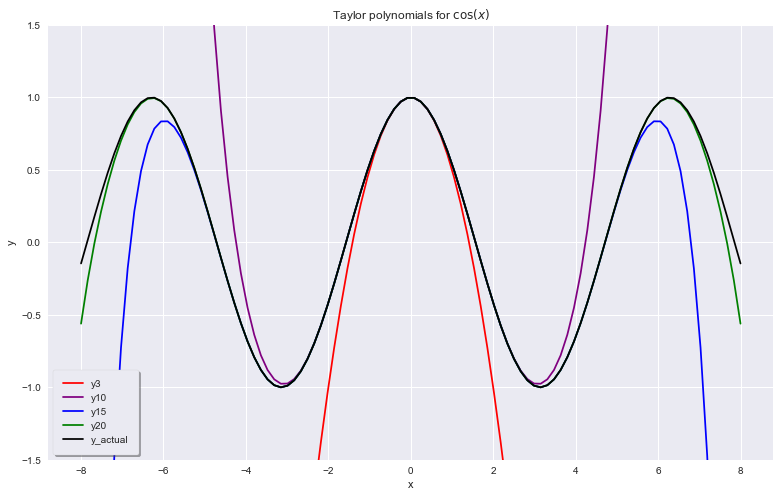

In [4]:
fig, ax = plt.subplots(figsize=(13, 8))
ax.set_ylim(-1.5, 1.5)

colors = ["red", "purple", "blue", "green"]

for max_term, color in zip(max_terms, colors):
    plt.plot(df1["x"], df1["y"+str(max_term)], color=color)
    
plt.plot(df1["x"], df1["y_actual"], color='black')

plt.legend(loc='lower left', fancybox=True, framealpha=1, shadow=True, borderpad=1, frameon=True)
ax.set(title=r"Taylor polynomials for $\cos(x)$", xlabel="x", ylabel="y");

## Example 2

Consider the function $f:\mathbb{R}\rightarrow[-1,1]$ defined as $f(x) = \exp(x)$.

Its Taylor expansion is given by

$$\exp(x) = \sum_{n=0}^{\infty} \frac{x^{n}}{n!}, \forall x \in \mathbb{R}$$

The code below show approximates for this function with 4, 7, 10 and 12 terms in the summation (or orders of the Taylor polynomials). The actual value for the function is also computed.

In [5]:
x = sp.symbols("x")
f = sp.exp(x)

f_series = functools.partial(taylor, var=x)

df2 = pd.DataFrame({"x": np.linspace(0, 10, num=100)})

max_terms = [4, 7, 10, 12]

for max_term in max_terms:
    df2["y" + str(max_term)] = np.array([f_series(f, x, max_terms=max_term) for x in df2["x"]])
    
df2["y_actual"] = np.exp(df2["x"])

df2.head()

,x,y4,y7,y10,y12,y_actual
0,0.00000,1.00000000000000,1.00000000000000,1.00000000000000,1.00000000000000,1.000000
1,0.10101,1.10628338962182,1.10628781630983,1.10628781633139,1.10628781633139,1.106288
2,0.20202,1.22380042990185,1.22387272976811,1.22387273256325,1.22387273256328,1.223873
3,0.30303,1.35358173099220,1.35395544439468,1.35395549277312,1.35395549277497,1.353955
4,0.40404,1.49665790304501,1.49786409830001,1.49786446547875,1.49786446551188,1.497864


The conclusion is the same as for the case shown above, namely, the higher the order of polynomial (or the number of terms in the summation) more precise the approximates become, even for distant points from which the series was generated at.

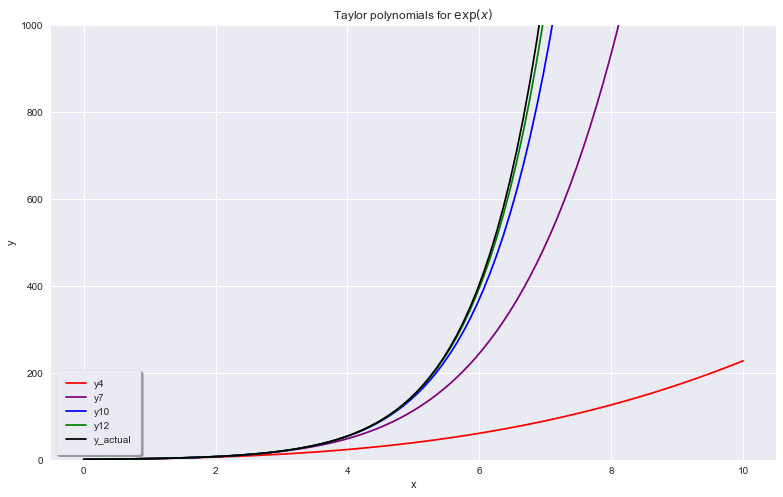

In [6]:
fig, ax = plt.subplots(figsize=(13, 8))
ax.set_ylim(0, 1000)

colors = ["red", "purple", "blue", "green"]

for max_term, color in zip(max_terms, colors):
    plt.plot(df2["x"], df2["y"+str(max_term)], color=color)
    
plt.plot(df2["x"], df2["y_actual"], color='black')

plt.legend(loc='lower left', fancybox=True, framealpha=1, shadow=True, borderpad=1, frameon=True)
ax.set(title=r"Taylor polynomials for $\exp(x)$", xlabel="x", ylabel="y");